This is a simple notebook that replicates https://mrf-web.readthedocs.io/en/latest/usage.html#usage

In [105]:
# needs correcting as the documentation a from MRF import *
from MacroRandomForest import *
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
n = 1000

# Create normally distributed data for each column
data = {
    'sim_y': np.random.normal(0, 1, n),
    'sim_x1': np.random.normal(0, 1, n),
    'sim_x2': np.random.normal(0, 1, n),
    'sim_x3': np.random.normal(0, 1, n),
    'sim_x4': np.random.normal(0, 1, n),
    'sim_x5': np.random.normal(0, 1, n),
    'sim_x6': np.random.normal(0, 1, n),
    'sim_x7': np.random.normal(0, 1, n),
    'sim_x8': np.random.normal(0, 1, n),
    'sim_x9': np.random.normal(0, 1, n),
    'sim_x10': np.random.normal(0, 1, n),
    'sim_x11': np.random.normal(0, 1, n),
    'sim_x12': np.random.normal(0, 1, n),
    'sim_x13': np.random.normal(0, 1, n),
    'sim_x14': np.random.normal(0, 1, n),
    'sim_x15': np.random.normal(0, 1, n),
    'trend': np.random.normal(0, 1, n)
}

# Create the DataFrame
simulated_data = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(simulated_data.head())

# Display basic information about the DataFrame
print(simulated_data.info())


      sim_y    sim_x1    sim_x2    sim_x3    sim_x4    sim_x5    sim_x6  \
0  0.496714  1.399355 -0.675178 -1.907808 -0.863494 -0.423760 -1.114081   
1 -0.138264  0.924634 -0.144519 -0.860385 -0.031203 -0.453414 -0.630931   
2  0.647689  0.059630 -0.792420 -0.413606  0.018017 -1.795643 -0.942060   
3  1.523030 -0.646937 -0.307962  1.887688  0.472630 -0.330090 -0.547996   
4 -0.234153  0.698223 -1.893615  0.556553 -1.366858  0.732829 -0.214150   

     sim_x7    sim_x8    sim_x9   sim_x10   sim_x11   sim_x12   sim_x13  \
0  0.785185 -0.033025  0.765402 -0.678495 -1.178180  1.174814  0.011736   
1 -1.777681 -0.503650  1.073413 -0.305499  0.432850 -1.878981  0.527439   
2  0.714746 -0.172375  0.498690 -0.597381  1.110753 -0.327795 -1.611003   
3 -0.233724  0.714732 -1.942498  0.110418  0.755185 -0.041660 -0.919898   
4  0.707458  1.277857 -0.155422  1.197179  1.084478  0.015909 -0.148179   

    sim_x14   sim_x15     trend  
0 -0.224241 -0.143423  0.879307  
1 -0.210835 -0.032656  0.03930

In [134]:
from sklearn.preprocessing import MinMaxScaler

simulated_data = pd.read_csv('final_dataset.csv', index_col=0)
simulated_data['trend'] = np.arange(1, len(simulated_data) + 1)
# simulated_data.reset_index(drop=True, inplace=True)

# normalization 
# simulated_data = simulated_data.apply(stats.zscore)
scaler = MinMaxScaler()
# simulated_data = pd.DataFrame(scaler.fit_transform(simulated_data), columns=simulated_data.columns)
# there is a problem with the data - the dependent variable should be the first column
# Move the 'gdp' column to the first position
gdp_column = simulated_data.pop('gdp')
simulated_data.insert(0, 'gdp', gdp_column)
# cannot display long column names
simulated_data.rename(columns={'government_expenditure': 'ge'}, inplace=True)
simulated_data.rename(columns={'balance_of_payments': 'bop'}, inplace=True)

### Dependent Variable
my_var = "gdp"
y_pos = simulated_data.columns.get_loc(my_var)

### Exogenous Variables
# S_vars = [f"sim_x{i}" for i in range(1, 16)] + ['trend']
S_vars = simulated_data.columns.tolist()
S_vars.remove(my_var)
S_pos = [simulated_data.columns.get_loc(s) for s in S_vars]

### Variables Included in Linear Equation
# changed from rate to balance of payments
x_vars = ['inflation', 'ge', 'Rate', 'bop']
# x_vars = ['inflation', 'Rate']
x_pos = [simulated_data.columns.get_loc(x) for x in x_vars]
oos_pos = np.arange(len(simulated_data) - 12 , len(simulated_data)) # lower should be oos start, upper the length of your dataset

In [135]:
simulated_data.head()
#this data is toffee ge is negative!

,gdp,inflation,ge,Rate,employment,bop,trend
1997-04-01,-2.034036,-0.169566,-1.508969,1.326899,-1.311034,1.238765,-1.726730
1997-05-01,-2.034036,-0.169566,-1.499548,1.455447,-1.248096,1.238765,-1.716071
1997-06-01,-2.034036,-0.169566,-1.405547,1.559115,-1.311034,1.238765,-1.705412
1997-07-01,-1.980514,0.006314,-1.451733,1.662783,-1.311034,1.324073,-1.694753
1997-08-01,-1.980514,-0.052313,-1.444960,1.766451,-1.185159,1.324073,-1.684094


In [125]:
y_pos = np.atleast_1d(y_pos)
x_pos = np.atleast_1d(x_pos)
S_pos = np.atleast_1d(S_pos)
oos_pos = np.atleast_1d(oos_pos)

MRF = MacroRandomForest(data = simulated_data,
                        y_pos = y_pos,
                        x_pos = x_pos,
                        S_pos = S_pos,
                        B = 400, # number of trees
                        parallelise = True,
                        n_cores = 12,
                        resampling_opt = 2, # what does this do?
                        oos_pos = oos_pos,
                        trend_push = 4,
                        quantile_rate = 0.3,
                        print_b = True,
                        fast_rw = True)

In [126]:
MRF_output = MRF._ensemble_loop()

Tree 1 out of 400
Tree 2 out of 400
Tree 3 out of 400
Tree 4 out of 400
Tree 5 out of 400
Tree 6 out of 400
Tree 7 out of 400
Tree 8 out of 400
Tree 9 out of 400
Tree 10 out of 400
Tree 11 out of 400
Tree 12 out of 400
Tree 13 out of 400
Tree 14 out of 400
Tree 15 out of 400
Tree 16 out of 400
Tree 17 out of 400
Tree 18 out of 400
Tree 19 out of 400
Tree 20 out of 400
Tree 21 out of 400
Tree 22 out of 400
Tree 23 out of 400
Tree 24 out of 400
Tree 25 out of 400
Tree 26 out of 400
Tree 27 out of 400
Tree 28 out of 400
Tree 29 out of 400
Tree 30 out of 400
Tree 31 out of 400
Tree 32 out of 400
Tree 33 out of 400
Tree 34 out of 400
Tree 35 out of 400
Tree 36 out of 400
Tree 37 out of 400
Tree 38 out of 400
Tree 39 out of 400
Tree 40 out of 400
Tree 41 out of 400
Tree 42 out of 400
Tree 43 out of 400
Tree 44 out of 400
Tree 45 out of 400
Tree 46 out of 400
Tree 47 out of 400
Tree 48 out of 400
Tree 49 out of 400
Tree 50 out of 400
Tree 51 out of 400
Tree 52 out of 400
Tree 53 out of 400
Tr

Text(0.5, 1.0, 'OOS predictions of MRF')

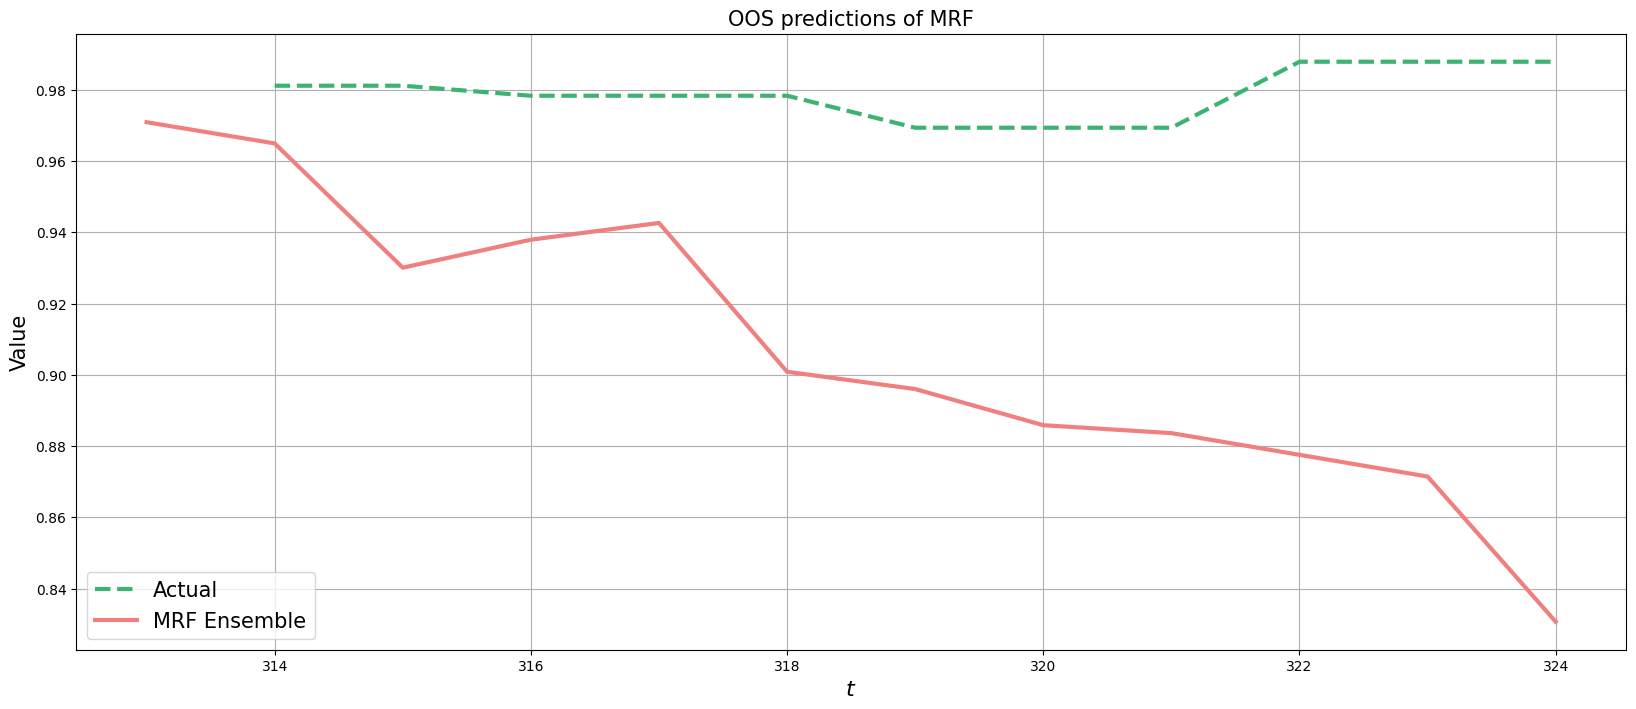

In [127]:
forecasts = MRF_output['pred']
betas = MRF_output['betas']


fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)

# Plotting actual versus original
# column names has dissapeared

ax.plot(simulated_data.iloc[oos_pos, 0].shift(1), label='Actual', linewidth=3, color='mediumseagreen', linestyle='--')
ax.plot(forecasts, color='lightcoral', linewidth=3, label='MRF Ensemble')

ax.legend(fontsize = 15)
ax.set_ylabel("Value", fontsize = 15)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF", fontsize = 15)

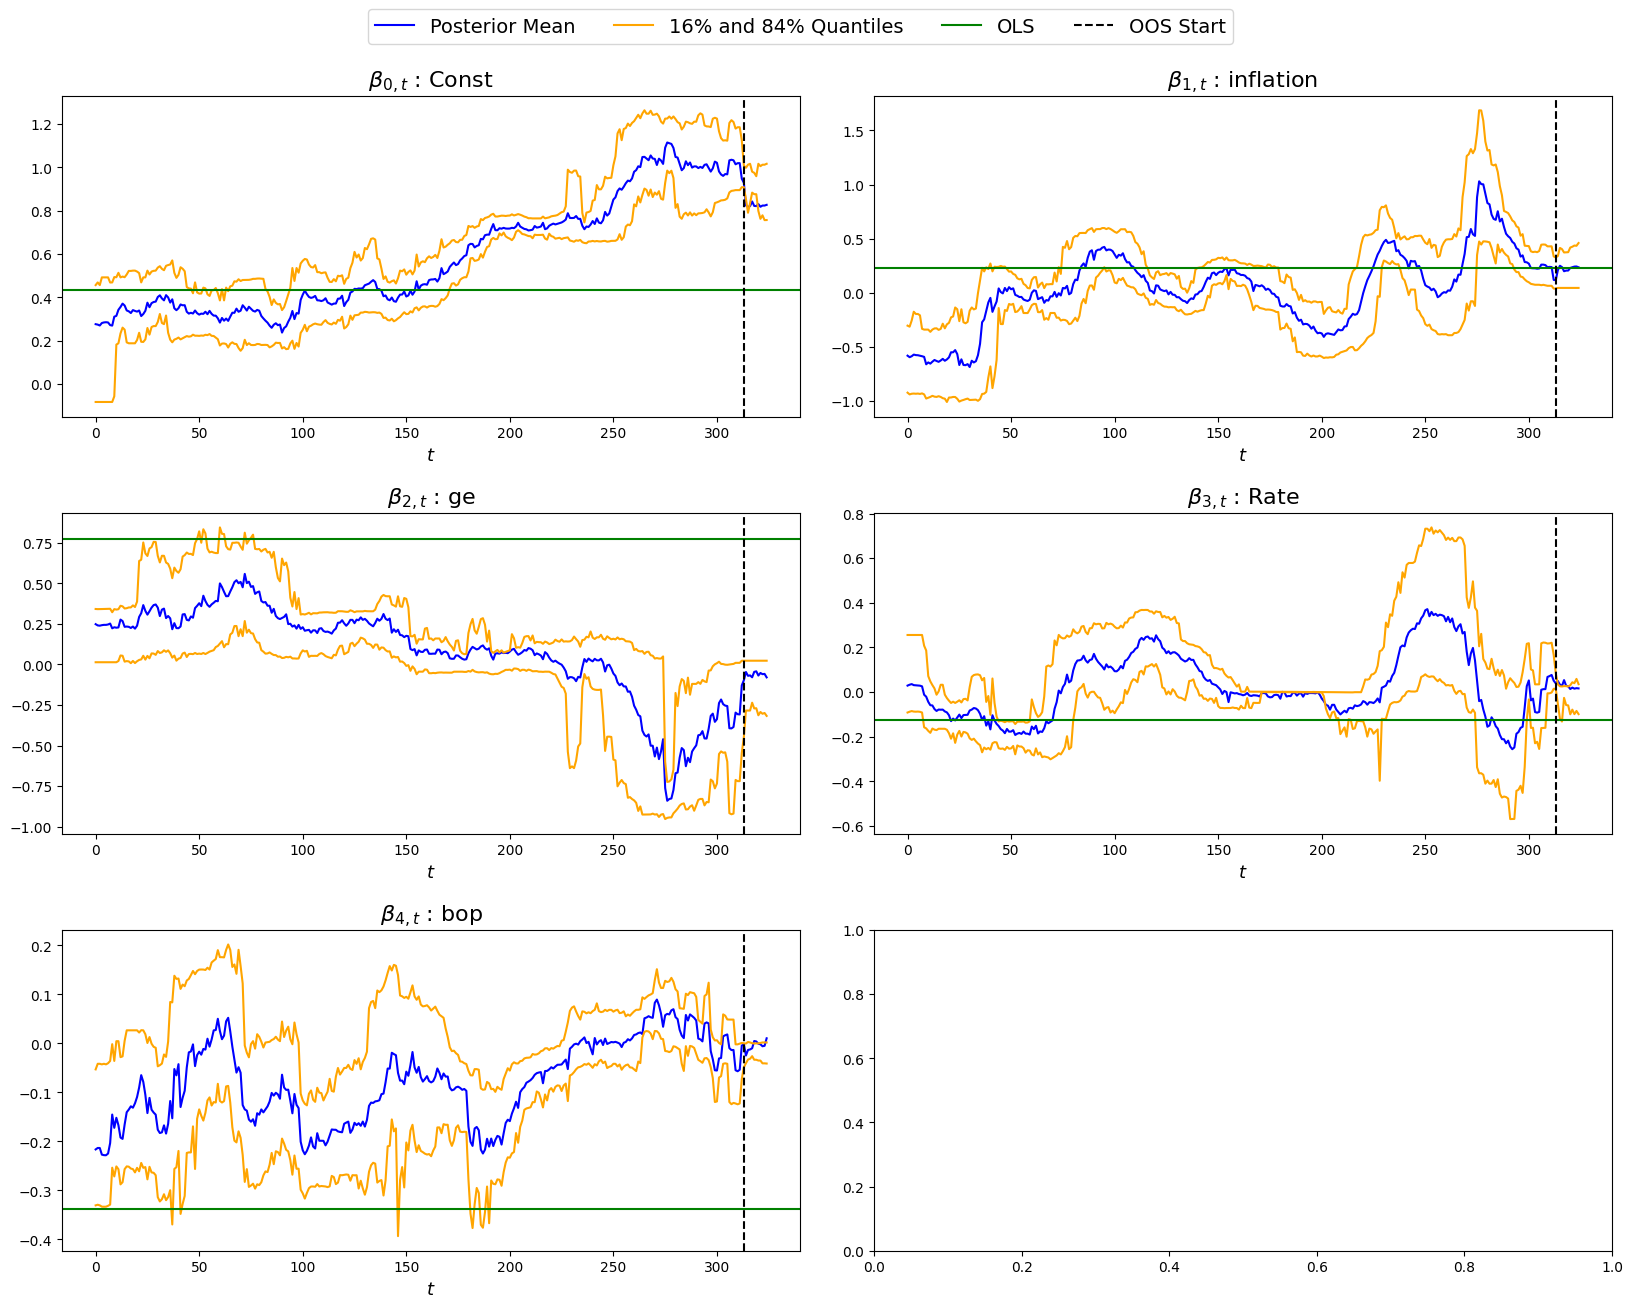

In [128]:
MRF.band_plots()